In [112]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample
import deltas.classifiers.models as models
from deltas.classifiers.mimic_train import LargeMarginClassifierMIMIC, MIMIC_torch
from sklearn.model_selection import GridSearchCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
dataset = 'MIMIC-III'  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)

MIMIC-III: 2837
Number of attribues: 19
Classes total: 2505 - 332

Classes train: 1753 - 232
Classes test:  752 - 100


In [114]:
data = data_clf['data']
# clf = MIMIC_torch(lr=0.001, cuda=False).fit(
#     data['X'], data['y'], epochs=50)
clf = models.NN(hidden_layer_sizes=(
    100, 500, 1000, 500, 100), max_iter=100).fit(data['X'], data['y'])
# param_grid = {'solver': ['lbfgs', 'sgd', 'adam'],
#               'hidden_layer_sizes': [(100,), (100, 500, 100), (100, 200, 200, 100), (100, 200, 500, 200, 100)],
#             'activation': ['relu', 'tanh', 'logistic'],
#             'learning_rate_init': [0.0001, 0.001, 0.01]}
# print('Tuning params with 5 fold CV')
#         # original
# grid_original = GridSearchCV(models.NN(), param_grid, refit=True, n_jobs=-1)
# grid_original.fit(data['X'], data['y'])
# clf = grid_original.best_estimator_
# print(f'Best params: {grid_original.best_params_}')

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Original Data
plotting training data as data input


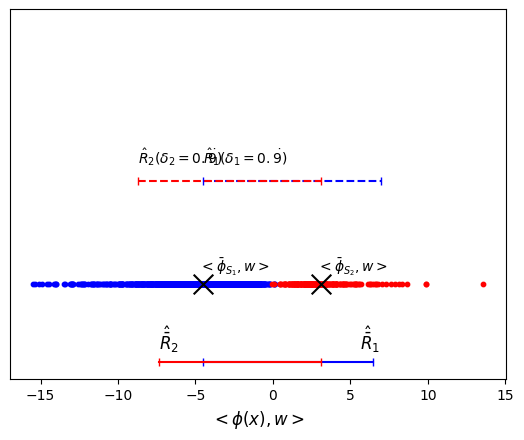

Budget 992 found 593 viable downsampled solutions
Best solution found by removing 319 data points
Downsampled Data:


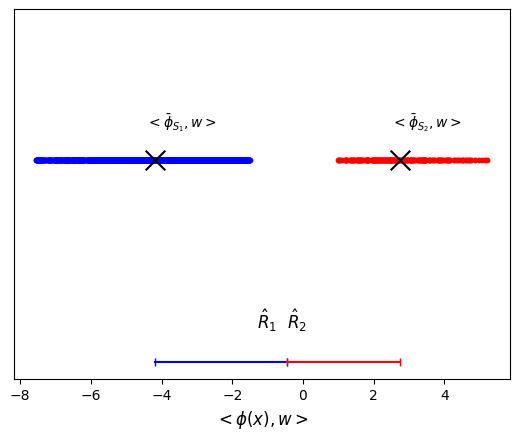

In [115]:
X = data_clf['data']['X']
y = data_clf['data']['y']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y,
                                                     alpha=10,
                                                     _print=True,
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

          Accuracy    G-Mean        F1
Method                                
Original  0.832160  0.448312  0.235294
Deltas    0.814554  0.471600  0.240385 


Original


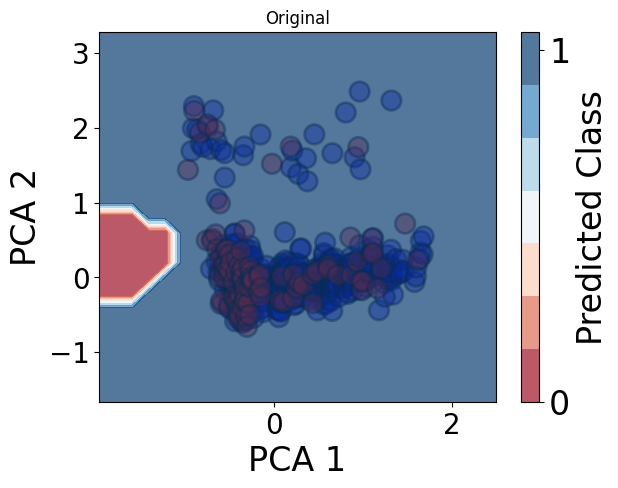

Deltas


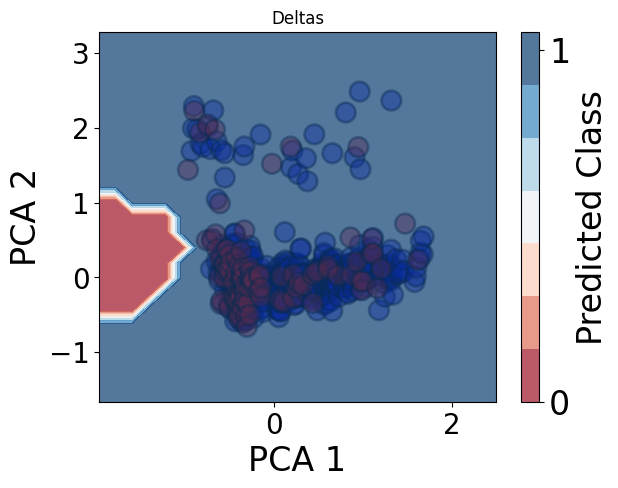

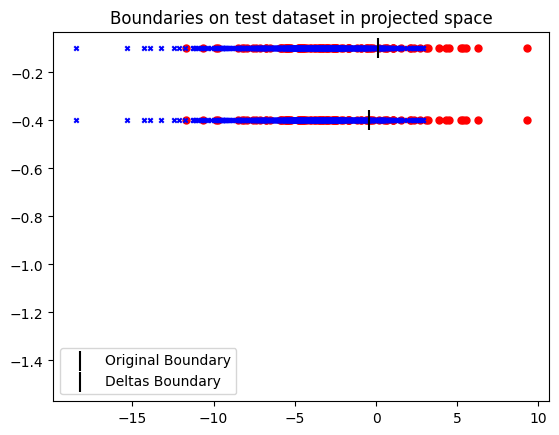

LATEX table format


\begin{tabular}{lrrr}
 & Accuracy & G-Mean & F1 \\
Method &  &  &  \\
Original & 0.8322 & 0.4483 & 0.2353 \\
Deltas & 0.8146 & 0.4716 & 0.2404 \\
\end{tabular}



,Accuracy,G-Mean,F1
Method,,,
Original,0.832160,0.448312,0.235294
Deltas,0.814554,0.471600,0.240385


In [116]:
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
                     _plot=True, dim_reducer=data_clf['dim_reducer'])